In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import itertools

import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from IPython.display import Image
from IPython import display
import matplotlib.pyplot as plt


# 1. Preprocessing

### read by f.readline()

In [3]:
datas = []
file = "./sample_data.txt"
with open(file, "r") as f:
    header = f.readline()
    while 1:
        line = f.readline()
        if not line:
            break
        tmp = line.strip().split('\t')
        freq = list(map(float, tmp[4:]))
        label = int(tmp[0])
#         label = tmp[0

        datas.append([freq,label])

# data = np.array(data)

# X = data[:, 1:]
# y = np.int32(data[:, 0])


In [23]:
len(datas)

10

# 2. Spectrogram

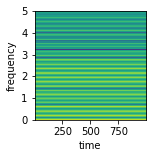

In [4]:
# test로 spectrogram 생성
plt.rcParams["figure.figsize"] = (2,2)
# plt.specgram(list(specs[15]), NFFT=10000, Fs=10, noverlap=5, detrend='mean', mode='psd')
plt.specgram(list(datas[0][0]), NFFT=10000, Fs=10, noverlap=5, detrend='mean', mode='psd')
plt.xlabel('time')
plt.ylabel('frequency')
plt.show()

In [5]:
# Input : numpy array
# Output : spectrogram numpy array

def spec_array(arr):
    plt.rcParams["figure.figsize"] = (3.1,3.1)
    plt.axis('off') # "invisable" axis in plot
    plt.xticks([]), plt.yticks([])
    plt.use_sticky_edges = True
    plt.margins(0)
    plt.specgram(list(arr), NFFT=10000, Fs=10, noverlap=5, detrend='mean', mode='psd')
    fig = plt.figure(1, tight_layout=True)
    fig.canvas.draw()
    fig.tight_layout(pad=0)
#     plt.close()
    
    # Now we can save it to a numpy array.
    data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    data = data.reshape((3,) + fig.canvas.get_width_height()[::-1])
#     return np.array(fig.canvas.renderer._renderer)
    return data
    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


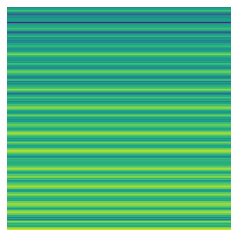

In [6]:
# spec_arr = spec_array(specs[0])
spec = spec_array(datas[0][0])
# spec_arr

In [7]:
spec.shape

(3, 223, 223)

(3, 161, 161)

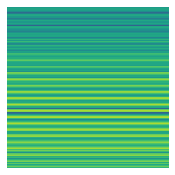

In [4]:
from spectrogram import Spectrogram

sp1 = Spectrogram()
spar = sp1.spec_array(datas[0][0])
spar.shape

In [9]:
print(len(spec))
print(len(spec[0]))
print(len(spec[1]))
print(len(spec[2]))
print(len(spec[3]))

144
144
144
144
144


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


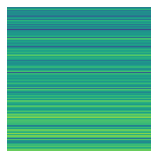

In [17]:
spec = spec_array(datas[2][0])

In [18]:
print(len(spec))
print(len(spec[0]))
print(len(spec[1]))
print(len(spec[2]))
print(len(spec[3]))
print(len(spec[143]))

144
144
144
144
144
144


In [34]:
spec[0].min()

255

In [35]:
cnt = 0
for pixel in spec[0]:
    cnt+=1
    print(pixel)

    

[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 255 255]
[255 2

NameError: name 'spec_arr' is not defined

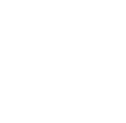

In [8]:
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.use_sticky_edges = True
plt.imshow(spec_arr)
plt.show()

# 3. Data Load

In [69]:
from torch.utils.data import DataLoader, Dataset

In [71]:
from spectrogram import Spectrogram

class TestDataset(Dataset):
    
    def __init__(self, file_pth: str, train=True, random_state=None):
        super(Dataset, self).__init__()
        
        self.sp = Spectrogram()
        
        self.file_pth = file_pth
        self.train = train
        self.random_state = None
        
        self.data = self.read_data()
        datasets = train_test_split(self.data)
        if train:
            self.train = datasets[0]
        else:
            # actually this is test dataset
            self.train = datasets[1]
    
    def __getitem__(self, index):
        
        # datasets[0][index][0]
        img = self.self.sp.spec_array(self.train[index][0])
        img = torch.tensor(img, dtype=torch.float64)
        target = self.train[index][1]
        target = torch.tensor(target)
        return img, target
    
    def __len__(self):
        return len(self.train)
    
    def read_data(self):
        datas = []
        #self.file = "./sample_data.txt"
        with open(self.file_pth, "r") as f:
            header = f.readline()
            while 1:
                line = f.readline()
                if not line:
                    break
                tmp = line.strip().split('\t')
#                 freq = list(map(float, tmp[4:]))
                freq = list(map(float, tmp[1:]))
#                 print(freq[-1])
                label = int(tmp[0])
                
                datas.append([freq,label])
                
        return datas
    
    def augment(self, datas):
        pass


# spectrogram 따로 뺌

#     def spec_array(self, arr):
#         plt.rcParams["figure.figsize"] = (3.4,3.4)
#         plt.axis('off') # "invisable" axis in plot
#         plt.xticks([]), plt.yticks([])
#         plt.use_sticky_edges = True
#         plt.margins(0)
#         plt.specgram(list(arr), NFFT=10000, Fs=10, noverlap=5, detrend='mean', mode='psd')
#         fig = plt.figure(1, tight_layout=True)
#         fig.canvas.draw()
#         fig.tight_layout(pad=0)
#     #     plt.close()

#         # Now we can save it to a numpy array.
#         data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
#         data = data.reshape((3,) + fig.canvas.get_width_height()[::-1])
#     #     return np.array(fig.canvas.renderer._renderer)
#         return data


### split data

In [6]:
data = []
# for spec in specs:
#     arr = spec_array(spec)
#     data.append(arr)
for i,d in enumerate(datas):
    arr = spec_array(d[0])
    d[0] = torch.tensor(arr) # .flatten()
#     data.append(arr)

NameError: name 'datas' is not defined

In [12]:
# renderer 미사용
datas[0][0].shape

torch.Size([3, 144, 144])

In [7]:
# validation 참조 https://discuss.pytorch.org/t/how-to-split-dataset-into-test-and-validation-sets/33987/5
datasets = train_test_split(datas)

NameError: name 'datas' is not defined

In [14]:
print(len(datasets[0]))
print(len(datasets[1]))

7
3


In [18]:
datasets[0][1][1]

0

In [19]:
# trainloader = torch.utils.data.DataLoader(datasets[0], batch_size=1,shuffle=False, num_workers=2)
# testloader = torch.utils.data.DataLoader(datasets[1], batch_size=1,shuffle=False, num_workers=2)

# 4. Modeling

In [14]:
train_dataset = TestDataset('./sample_data.txt')
test_dataset = TestDataset('./sample_data.txt', train=False)
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=2,shuffle=False, num_workers=2)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=2,shuffle=False, num_workers=2)

In [72]:
train_dataset = TestDataset('../augmented.txt')
test_dataset = TestDataset('../augmented.txt', train=False)
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=2,shuffle=False, num_workers=2)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=2,shuffle=False, num_workers=2)

In [43]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1)
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=50, kernel_size=3, stride=1)
        self.fc0 = nn.Linear(57800, 34)from torchvision.models import resnet34
        self.fc1 = nn.Linear(34, 10)
        self.fc2 = nn.Linear(10, 2)

#     def forward(self, x):
#         x = F.relu(self.conv1(x.float()))
#         x = F.max_pool2d(x, kernel_size=2, stride=2)
#         x = F.relu(self.conv2(x))
#         x = F.max_pool2d(x, kernel_size=2, stride=2)

#         x = x.view(-1, 4 * 4 * 50) # [batch_size, 50, 4, 4]
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x
    
    
    
    
    def forward(self,x):
        x = x.view(-1, 3, 144, 144)
        x = F.max_pool2d(F.relu(self.conv1(x.float())), (2,2))
        
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
#         x.view(-1, self.num_flat_features(x))
        x = x.view(-1, self.num_flat_features(x))
        # torch.Size([2, 50, 34, 34])
#         print(f'what is this?{x.shape}')
        x = F.relu(self.fc0(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
#        print(x.shape)
#         x = self.fc3(x)
        return F.log_softmax(x, dim=1)
#         return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
#        print(f'size: {size}')
        num_features = 1
        for s in size:
            num_features *= s
#        print(f'num_features: {num_features}')
        # 57800
        return num_features

SyntaxError: invalid syntax (<ipython-input-43-ee8a57bbcde4>, line 6)

In [44]:
from torchvision.models import resnet34

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.model = resnet34(pretrained=True)
        print(self.model.fc.in_features)
        
        self.fc = nn.Linear(512, 2)
#         self.fc0 = nn.Linear(57800, 34)
#         self.fc1 = nn.Linear(34, 10)
#         self.fc2 = nn.Linear(10, 2)
    
    
    
    
    def forward(self,x):
        x = x.view(-1, 3, 224, 224)
        x = F.relu(model(x))
#         x.view(-1, self.num_flat_features(x))
        x = x.view(-1, self.num_flat_features(x))
        # torch.Size([2, 50, 34, 34])
#         print(f'what is this?{x.shape}')
        x = F.relu(self.fc(x))

#        print(x.shape)
#         x = self.fc3(x)
        return F.log_softmax(x, dim=1)
#         return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
#        print(f'size: {size}')
        num_features = 1
        for s in size:
            num_features *= s
#        print(f'num_features: {num_features}')
        # 57800
        return num_features

In [45]:
cnn = CNN().to('cuda')
criterion = torch.nn.CrossEntropyLoss()
#optimizer = optim.SGD(cnn.parameters(), lr=0.01)
# criterion = torch.nn.BCELoss()
optimizer = optim.Adam(cnn.parameters(), lr=0.01)

512


In [46]:
cnn.train()  # 학습을 위함
for epoch in range(10):
    for index, (data, target) in enumerate(trainloader):
        data = data.to('cuda')
        target = target.to('cuda')
        optimizer.zero_grad()  # 기울기 초기화
        output = cnn(data)
#         print(f"output : {output}, target:{target}")
        loss = criterion(output, target)
        loss.backward()  # 역전파
        optimizer.step()

    if index % 1 == 0:
      print("loss of {} epoch, {} index : {}".format(epoch, index, loss.item()))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:65: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:65: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


RuntimeError: shape '[-1, 3, 224, 224]' is invalid for input of size 357216

In [ ]:
cnn.eval()  # test case 학습 방지를 위함
test_loss = 0
correct = 0
with torch.no_grad():
  for data, target in testloader:
    output = cnn(data)
    test_loss += criterion(output, target).item() # sum up batch loss
    pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(testloader.dataset),
        100. * correct / len(testloader.dataset)))

# test

https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/02-intermediate/convolutional_neural_network/main.py#L35-L56

In [13]:
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 5
num_classes = 2
batch_size = 2
learning_rate = 0.001


# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=2):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 10, kernel_size=3, stride=1),
            nn.BatchNorm2d(10),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(10, 50, kernel_size=3, stride=1),
            nn.BatchNorm2d(50),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(57800, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(trainloader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trainloader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f517a0a4320>
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f517a0a4320>
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 961, in __del__
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
    self._shutdown_workers()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
    w.join()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 138, in join
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
    as

RuntimeError: Input type (torch.cuda.DoubleTensor) and weight type (torch.cuda.FloatTensor) should be the same